# Graph Quality Diversity
## Experimental results

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kruskal, mannwhitneyu

In [2]:
environments = ["pointmaze", "robotmaze", "hopper_uni", "walker2d_uni"]

In [4]:
dfs = []
validation_dfs = []
for seed in range(30):
    for sampling in ["both", "s1", "s2", "mapelites", "ga", "ne"]:
        for env in environments:
            sampling_string = sampling \
                if (sampling.startswith("map") or sampling.startswith("ga")) else "bimapelites_" + sampling
            sampling_string += "_cgp"
            if sampling.startswith("ne"):
                sampling_string = "ne"
            run = f"{sampling_string}_{env}_{seed}"

            df = pd.read_csv(f"../results/{run}.csv")
            df["seed"] = seed
            df["sampling"] = sampling
            df["environment"] = env
            if "ne" in run:
                df["coverage1"] = df["coverage"]
            dfs.append(df)

            validation_df = pd.read_csv(f"../results/{run}_validation.csv")
            validation_df["seed"] = seed
            validation_df["sampling"] = sampling
            validation_df["environment"] = env
            validation_dfs.append(validation_df)
df = pd.concat(dfs, ignore_index=True)
validation_df = pd.concat(validation_dfs, ignore_index=True)
df = df.dropna(subset=["max_fitness"])
df.head()

,loop,iteration,qd_score1,max_fitness,coverage1,time,current_time,qd_score2,coverage2,seed,sampling,environment,qd_score,coverage
0,1,1,7307.3184,-72.67905,8.496094,9.307514,2023-12-14 17:36:00.681474,11815.283,10.351562,0,both,pointmaze,NaN,NaN
1,2,11,11710.5200,-72.42829,12.890625,0.331574,2023-12-14 17:36:16.046003,16020.581,12.890625,0,both,pointmaze,NaN,NaN
2,3,21,15628.1290,-69.76767,16.699219,0.337842,2023-12-14 17:36:16.984831,18301.043,14.062500,0,both,pointmaze,NaN,NaN
3,4,31,18223.9790,-68.89027,19.140625,0.338925,2023-12-14 17:36:17.925590,19887.564,14.941406,0,both,pointmaze,NaN,NaN
4,5,41,21881.9340,-68.89027,21.875000,0.367041,2023-12-14 17:36:18.898440,21466.360,15.722656,0,both,pointmaze,NaN,NaN


In [5]:
final_df = df[df["iteration"] == max(df["iteration"])]
final_df.head()

,loop,iteration,qd_score1,max_fitness,coverage1,time,current_time,qd_score2,coverage2,seed,sampling,environment,qd_score,coverage
999,1000,9991,146070.84,-31.398048,99.70703,0.349910,2023-12-14 17:52:19.766152,100638.380,57.226562,0,both,pointmaze,NaN,NaN
1999,1000,9991,-484588.30,-83.087110,86.13281,5.590183,2023-12-14 21:15:02.262892,-117073.740,59.179688,0,both,robotmaze,NaN,NaN
2999,1000,9991,2052316.10,1678.597000,93.75000,18.871874,2023-12-08 03:23:14.168373,982406.560,53.710938,0,both,hopper_uni,NaN,NaN
3999,1000,9991,2329175.50,1852.286600,89.16016,37.309634,2023-12-08 04:10:21.174849,1237427.400,51.269530,0,both,walker2d_uni,NaN,NaN
4999,1000,9991,148472.52,-29.842213,100.00000,0.347066,2023-12-14 18:08:27.637803,31499.734,19.042969,0,s1,pointmaze,NaN,NaN


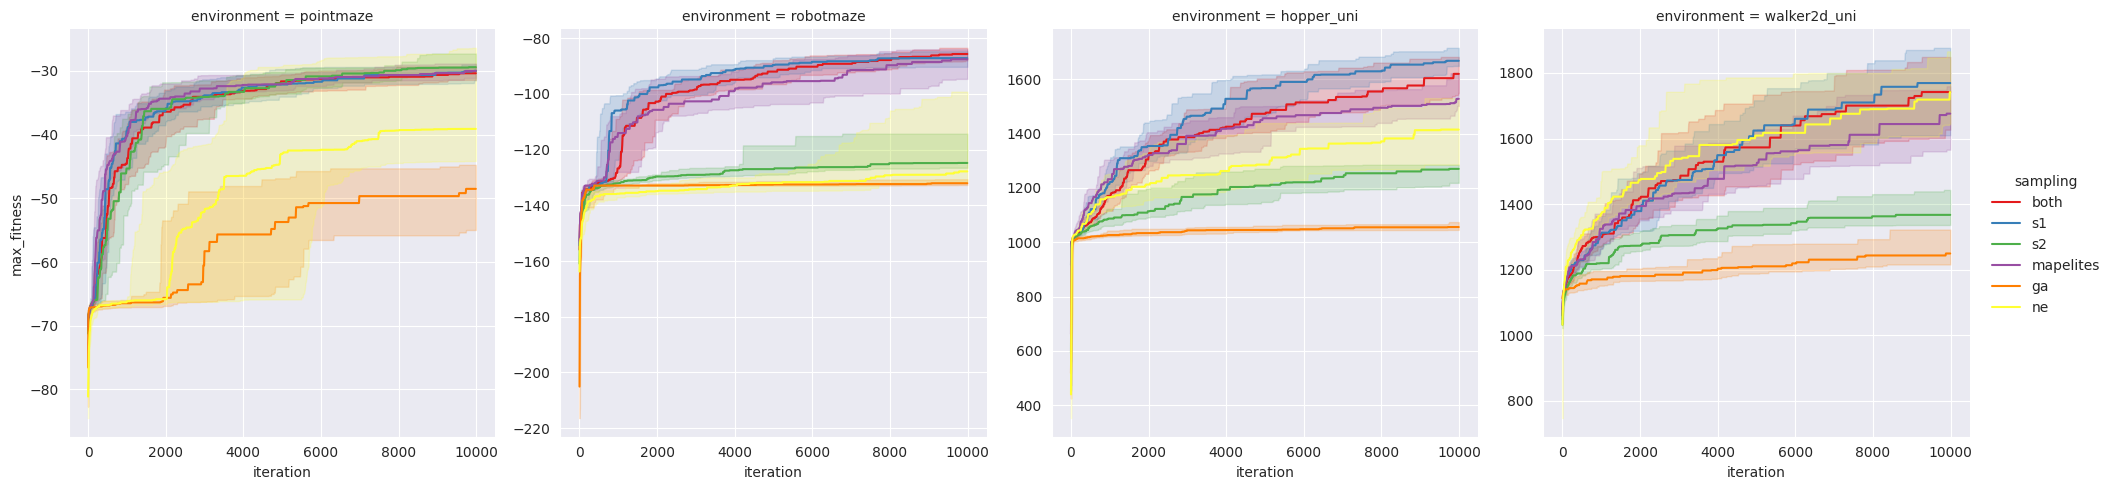

In [6]:
g = sns.relplot(
    data=df,
    x="iteration",
    y="max_fitness",
    hue="sampling",
    col="environment",
    kind="line",
    estimator="median",
    errorbar=("pi", 50),
    facet_kws=dict(sharey=False),
    palette="Set1"
)
plt.show()

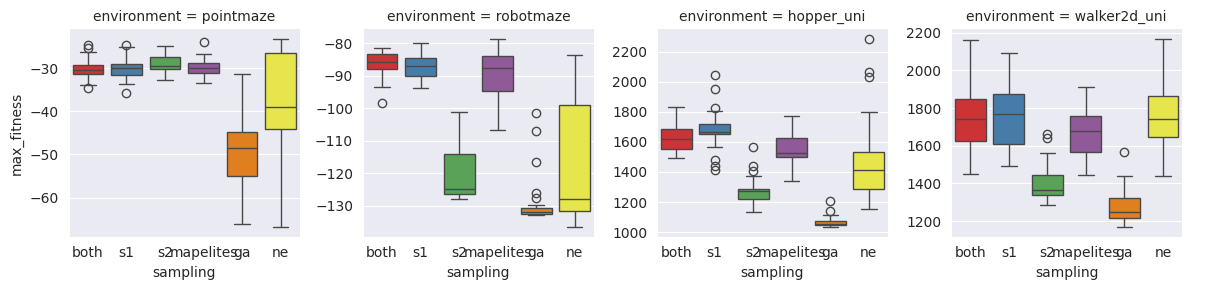

In [7]:
g = sns.FacetGrid(final_df, col="environment", sharey=False)
g.map_dataframe(sns.boxplot, y="max_fitness", x="sampling", hue="sampling", palette="Set1")
g.add_legend()
plt.show()

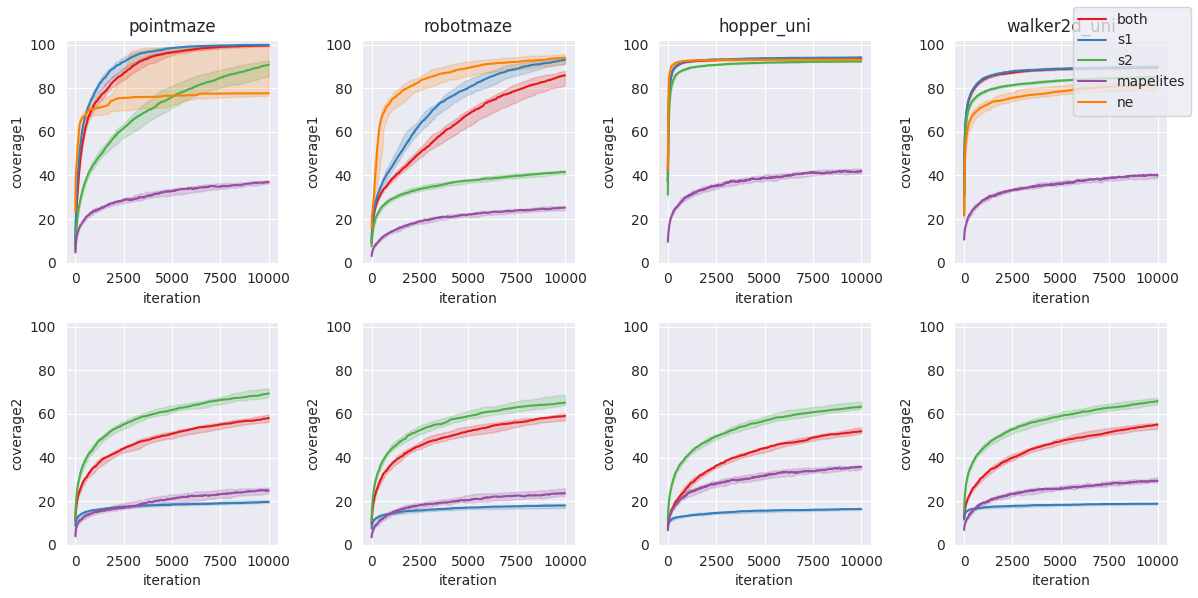

In [9]:
fig, axs = plt.subplots(2, len(environments), figsize=(12, 6))
for i, env in enumerate(environments):
    tmp_df = df[(df["environment"] == env) & (df["sampling"] != "ga")]
    sns.lineplot(
        data=tmp_df,
        x="iteration",
        y="coverage1",
        hue="sampling",
        estimator="median",
        errorbar=("pi", 50),
        ax=axs[0][i],
        palette="Set1"
    )
    sns.lineplot(
        data=tmp_df,
        x="iteration",
        y="coverage2",
        hue="sampling",
        estimator="median",
        errorbar=("pi", 50),
        ax=axs[1][i],
        palette="Set1"
    )
    axs[0][i].set_title(env)
    for k in range(2):
        axs[k][i].set_ylim([0, 102])
        axs[k][i].get_legend().set_visible(False)
handles, labels = axs[0][0].get_legend_handles_labels()
fig.legend(handles, labels)
fig.tight_layout()
plt.show()

In [10]:
validation_df.head()

,average_difference,max_difference,min_difference,average_relative_difference,min_relative_difference,max_relative_difference,max_validation_fitness,difference_of_maxs,relative_difference_of_maxs,relative_difference_baseline,repertoire_id,sensor_id,seed,sampling,environment
0,inf,3.402823e+38,-36.01674,NaN,-inf,inf,-36.234450,104.836400,1.528184,1.630758,1,0,0,both,pointmaze
1,inf,3.402823e+38,-36.01674,NaN,-inf,inf,-36.234450,104.836400,1.528184,1.630758,2,0,0,both,pointmaze
2,inf,3.402823e+38,-76.87857,inf,-1.000631e+37,5.714111e+37,28.884247,39.717705,0.578959,1.453502,1,1,0,both,pointmaze
3,inf,3.402823e+38,-76.87857,inf,-1.000631e+37,5.714111e+37,28.884247,39.717705,0.578959,1.453502,2,1,0,both,pointmaze
4,inf,3.402823e+38,-903.31140,-1.118742e+34,-4.090720e+36,2.084362e+02,16.912888,0.000000,0.000000,0.000000,1,0,0,both,robotmaze


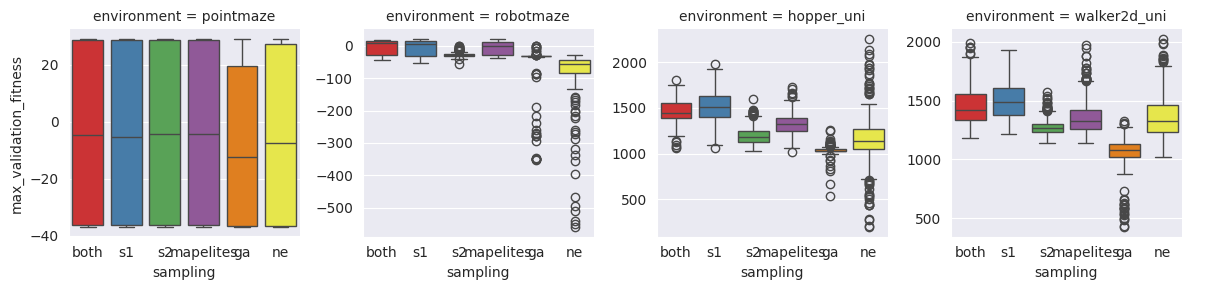

In [11]:
filtered_df = validation_df[(validation_df["repertoire_id"] == 1) | (validation_df["repertoire_id"] == "main")]
g = sns.FacetGrid(filtered_df, col="environment", sharey=False)
g.map_dataframe(sns.boxplot, y="max_validation_fitness", x="sampling", hue="sampling", palette="Set1")
g.add_legend()
plt.show()

## Statistical tests

In [8]:
methods = ["s1", "mapelites", "both"]
print(f"Kruskal-Wallis H-test among {methods}")
for env in environments:
    samples = []
    for method in methods:
        lst = final_df[(final_df["environment"] == env) & (final_df["sampling"] == method)]["max_fitness"].tolist()
        samples.append(lst)
    _, p_value = kruskal(*samples)
    print(f"{env}\t{p_value:.4f}")

Kruskal-Wallis H-test among ['s1', 'mapelites', 'both']
pointmaze	0.8147
robotmaze	0.2662
hopper_uni	0.0003
walker2d_uni	0.0395


In [12]:
comparisons = [["s1", "mapelites"], ["mapelites", "both"], ["both", "s1"]]
envs = ["hopper_uni"]
for methods in comparisons:
    print(f"Mann-Whitney U-test among {methods}")
    for env in envs:
        samples = []
        for method in methods:
            lst = final_df[(final_df["environment"] == env) & (final_df["sampling"] == method)]["max_fitness"].tolist()
            samples.append(lst)
        _, p_value = mannwhitneyu(*samples)
        print(f"{env}\t{p_value:.4f}")
    print()

Mann-Whitney U-test among ['s1', 'mapelites']
hopper_uni	0.0002

Mann-Whitney U-test among ['mapelites', 'both']
hopper_uni	0.0070

Mann-Whitney U-test among ['both', 's1']
hopper_uni	0.0484
